In [1]:
from sklearn import datasets
import pandas as pd

# wine
wine = datasets.load_wine() # wineのデータを辞書型で取得
# 辞書型の変数からDataFrameを作成
df = pd.DataFrame(data = wine['data'], columns=wine['feature_names'])
df['target'] = wine['target']

In [2]:
# 最小値と最大値の確認
import numpy as np
print('proline: ', np.min(df['proline']), np.max(df['proline']))
print('hue: ', np.min(df['hue']), np.max(df['hue']))

proline:  278.0 1680.0
hue:  0.48 1.71


In [3]:
# 特徴量とターゲットを取得
#features = ['alcohol', 'hue']
features = ['proline', 'hue']
# 新しいデータフレーム作成
dfn = df[features+["target"]]

X = dfn[features].values
y = dfn['target']

In [4]:
from sklearn.neighbors import KNeighborsClassifier # k近傍法のクラス

# 学習
kNC = KNeighborsClassifier(n_neighbors=3) # 近傍点を3個にしてインスタンス作成
kNC.fit(X, y) # k近傍法の学習

y_pred = kNC.predict(X) # 予測の取得
pd.DataFrame({'y':y, 'y_pred':y_pred})[::20] # 予測値の確認

y  y_pred
0    0       0
20   0       0
40   0       0
60   1       1
80   1       1
100  1       1
120  1       1
140  2       2
160  2       2

In [5]:
# 標準化しない場合の正解率
kNC.score(X, y)

0.8539325842696629

c:\home\lecture\Intro_to_ML_app\教師あり学習\sub.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


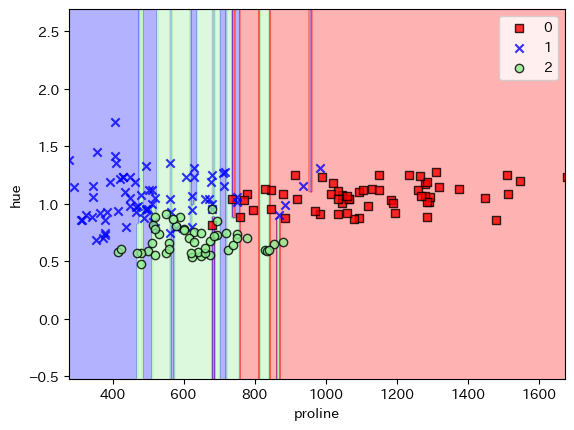

In [6]:
import sub 
# 境界線図を描画
sub.draw_boundary_map(dfn, kNC)

In [7]:
# 標準化
from sklearn.preprocessing import StandardScaler

SS = StandardScaler() # インスタンスを作成
X_ss = SS.fit_transform(X) # データXを標準化

# 学習
kNC_ss = KNeighborsClassifier(n_neighbors=3) # 近傍点を3個にしてインスタンス作成
kNC_ss.fit(X_ss, y) # k近傍法の学習

y_ss_pred = kNC_ss.predict(X_ss) # 予測の取得

In [8]:
# 標準化した場合の正解率
kNC_ss.score(X_ss, y)

0.9157303370786517

c:\home\lecture\Intro_to_ML_app\教師あり学習\sub.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


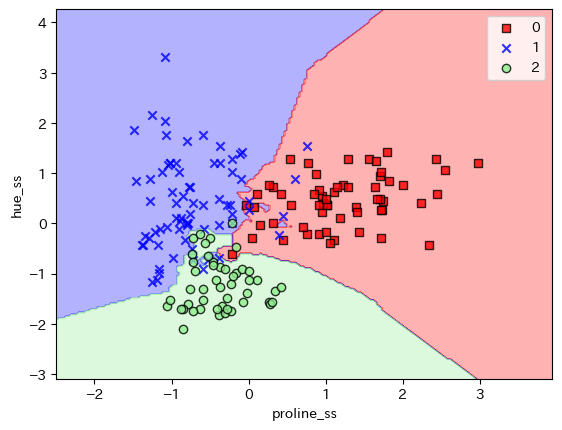

In [9]:
# 標準化したデータに対してデータフレーム作成
dfn_ss = pd.DataFrame(X_ss, columns=['proline_ss', 'hue_ss'])
dfn_ss['target'] = dfn['target']
# 境界線図を描画
sub.draw_boundary_map(dfn_ss, kNC_ss)

c:\home\lecture\Intro_to_ML_app\教師あり学習\sub.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


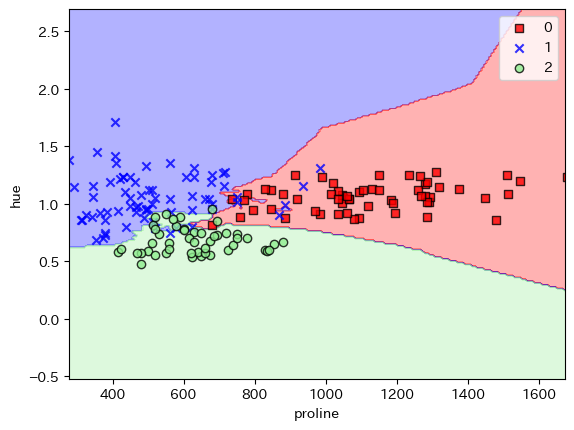

In [10]:
# 逆変換したデータに対して境界線図を描画
sub.draw_boundary_map(dfn, kNC_ss, scaler=SS)